# Project #1

Either: Write report in LaTex, or present project to class 

Eg. Present an explanation of simpsons rule 15-20 minutes in class

Topics to chose from (anything from class is good):
* Mathematica
* ODE Calculator
* Simpson's Rule
* Gausian Quatature (Advanced)
* See Dr. Remington to ask about more topics


# Advanced Methods for Integration

Previous: Approximate area under curve as trapezoid

Simpson's Rule: Take 3 points and approximate curve as parabola 

y = Ax^2 + Bx + C

Easy to implement

Integral from a to b (f(x)dx) ~~ h/3[f(a) + f(b)] + 4*sum(n=1, N-1, odd ns only, f(xn)) + 2*sum(n=2, N-2, even ns only, f(xn))

In [2]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import math

In [3]:
# Trapezoid Method
def integrateTrap(func, a, b, steps):
    x = np.linspace(a, b, steps+1)
    y = func(x)
    
    h = (b-a)/steps

    s_terms = (func(a)+func(b))*h/2
    
    #for i in x[1:-1]:
    #    s = s + func(i)*h
    
    #s_total = s_terms + np.sum(func(x[1:-1])*h)
    
    s_total = s_terms + np.sum(y[1:steps]*h)
    
    return s_total

# Simpson's Methood
def integrateSimp(func, a, b, steps):
    # stepsFix = int(steps/2)*2
    if steps%2 != 0:
        steps += 1
        print("Changed steps to", steps, "(even number is required)")
    x = np.linspace(a, b, steps+1)
    y = func(x)
    h = (b-a)/steps

                                #sum(y[start:stop:skip_every])
    s = h/3*(y[0] + y[-1] + 4*np.sum(y[1:steps:2]) + 2*np.sum(y[2:steps-1:2]))

    return s
            
            
        

In [4]:
def myFunc(x):return x**4-2*x+1

In [5]:
def funcE(t):return (math.e**(-t**2))

In [6]:
def eNeg(x): return np.exp(-x)

In [127]:
def f(x): return eNeg(x) - x

In [7]:
def E(b):
    steps = b*10
    if steps%2 != 0:
        steps += 1
        print("Changed steps to", steps, "(even number is required)")
        
    def func(t):
        return (math.e**(-t**2))
    
    a = 0
    t = np.linspace(a, b, steps+1)
    y = func(t)
    h = (b-a)/steps
    
    s = []
    for i in t:
        s.append(integrateSimp(func, i, i+1, 10))

    return s, t
    

In [167]:
# a = .5672
# b = .5671
a = 0
b = 1
t = np.linspace(a, b, 1001)


ilast = 0
s = []
s2 = []
s3 = np.array([])
for i in t:
    #s.append(integrateSimp(eNeg, a, b, 10))
    s2.append(eNeg(i))
    s3 = np.append(s3, f(i))
    

    
    
# print(t)
print(s3)
print(np.where(t == 0))
print(np.where(s3 == 0))



[ 1.          0.9980005   0.996002   ... -0.62938406 -0.6307525
 -0.63212056]
(array([0]),)
(array([], dtype=int64),)


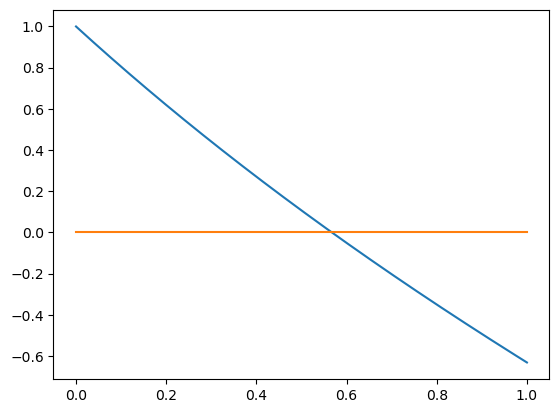

In [143]:
fig0, ax0 = plt.subplots()


# ax0.plot(t,s2)
ax0.plot(t,s3)
# ax0.plot(t,t)
ax0.plot(t, t*0)

In [ ]:
##################### CHAT GPT, I DON'T KNOW WHAT THIS DOES #############################

import scipy.integrate as spi
import numpy as np

# Define the function to be integrated
def integrand(t):
    return np.exp(-t**2)

# Define the integration limits
x_lower = 0
x_upper = 3

# Use the quad function from scipy to perform the numerical integration
result, _ = spi.quad(integrand, x_lower, x_upper)

print("Approximate value of the integral:", result)


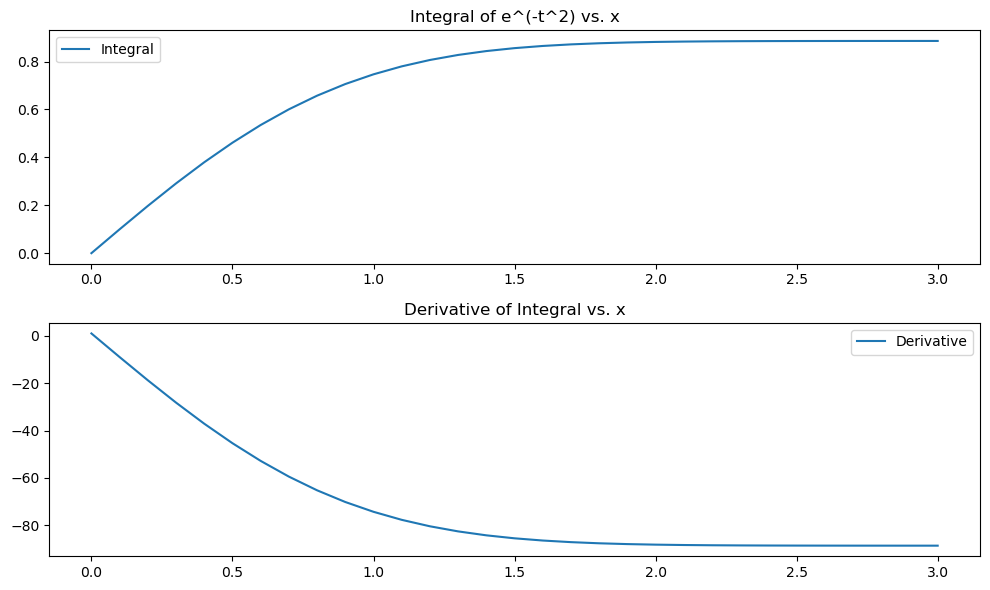

In [9]:
##################### CHAT GPT, I DON'T KNOW WHAT THIS DOES #############################

import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Define the function to be integrated
def integrand(t):
    return np.exp(-t**2)

# Define the integration limits
x_lower = 0
x_upper = 3

# Values of x at increments of 0.1
x_values = np.arange(x_lower, x_upper + 0.1, 0.1)

# Initialize lists to store results
integral_values = []
derivative_values = []

# Compute the integral and derivative at each x
for x in x_values:
    result, _ = spi.quad(integrand, x_lower, x)
    integral_values.append(result)
    
    # Numerical differentiation to compute the derivative
    h = 0.01  # Small step for differentiation
    derivative = (spi.quad(integrand, x, x + h)[0] - result) / h
    derivative_values.append(derivative)

# Plot the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(x_values, integral_values, label='Integral')
plt.title('Integral of e^(-t^2) vs. x')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x_values, derivative_values, label='Derivative')
plt.title('Derivative of Integral vs. x')
plt.legend()

plt.tight_layout()
plt.show()
